In [1]:
import sys

sys.path.append(".")

from src.models.unet import UNet
from src.components.components import *


from src.modules.diffusion_model import DiffusionModel

import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt

import pytorch_lightning as pl


/home/engineer/anaconda/envs/palamariuk-genai/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = torchvision.datasets.MNIST(root="./data", train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Device: {device}\n')

Device: cuda



# 1

(10 pt.) Implement and train (unconditional) Diffusion model using DDPM. Implement inference using DDIM. (pixel-based)
- (based on previous HW) you could use MNIST
- (based on previous HW) try to use training pipeline from previous HW, but you could use pytorch lightning (or any other) tool for training

In [4]:
unet = UNet(
    in_channels=1,
    out_channels=1,
    base_channels=32,
    channel_mults=(1, 2),
    num_res_blocks=2,
    time_emb_dim=128,
    attn_resolutions=[1]
).to(device)

diffusion_module = DiffusionModel(unet, T=1000, beta_start=1e-4, beta_end=2e-2, lr=1e-4).to(device)

In [5]:
retrain = False

if retrain:
    trainer = pl.Trainer(max_epochs=50, accelerator="gpu" if torch.cuda.is_available() else "cpu")
    trainer.fit(diffusion_module, train_loader)
    torch.save(diffusion_module.unet, 'models/weights/ddpm_unet_100.pth')
else:
    diffusion_module.unet = torch.load('models/weights/ddpm_unet_100.pth', weights_only=False).to(device)

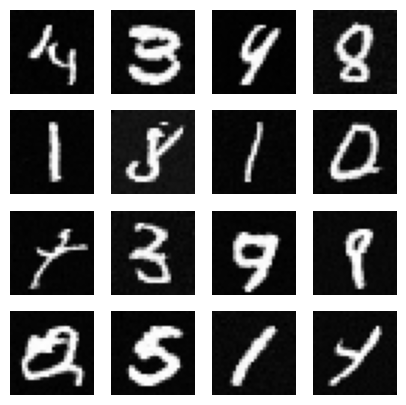

In [7]:
samples = diffusion_module.sample_ddim(batch_size=16, size=(1, 28, 28), ddim_steps=100)

fig, axes = plt.subplots(4, 4, figsize=(5, 5))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(samples[i, 0], cmap="gray")
    ax.axis("off")
plt.show()

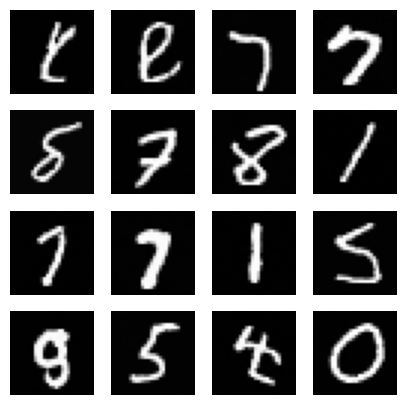

In [8]:
samples = diffusion_module.sample_ddpm(batch_size=16, size=(1, 28, 28))

fig, axes = plt.subplots(4, 4, figsize=(5, 5))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(samples[i, 0], cmap="gray")
    ax.axis("off")
plt.show()